In [1]:
import pprint
from scipy.optimize import linprog
import numpy as np
import sys
import unittest

def nash_equilibrium(a):
    numrows = len(a)
    numcols = len(a[0])

    c1 = [1] * numrows
    c2 = [-1] * numcols
    
    min_el = a[0][0]
    for i in range(numrows):
        for j in range(numcols):
            if a[i][j] < min_el:
                min_el = a[i][j]
    was_le_zero = False
    if min_el <= 0:
        was_le_zero = True
        for i in range(numrows):
            for j in range(numcols):
                a[i][j] = a[i][j] - min_el + 1 

    A2 = np.asarray(a)
    A1 = -1 * np.asarray(A2.transpose())

    b1 = [-1] * numcols
    b2 = [1] * numrows

    res1 = linprog(c1, A_ub=A1, b_ub=b1)
    res2 = linprog(c2, A_ub=A2, b_ub=b2)

    v = 1/res1.fun

    p = [1] * numrows
    q = [1] * numcols

    p = res1.x * v
    q = res2.x * v
    if was_le_zero:
        v = v + min_el - 1 

    print(np.around(v, decimals = 9))
    print(np.around(p.tolist(), decimals = 9))
    print(np.around(q.tolist(), decimals = 9))
    return p, q

matrix = open('matrix.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        matrix[i][j] = int(matrix[i][j])

p, q = nash_equilibrium(matrix)


4.870967742
[0.         0.12903226 0.09677419 0.43548387 0.33870968]
[0.         0.         0.69086022 0.14516129 0.14784946 0.01612903]


In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
n1 = np.arange(1, len(p) + 1)
n2 = np.arange(1, len(q) + 1)

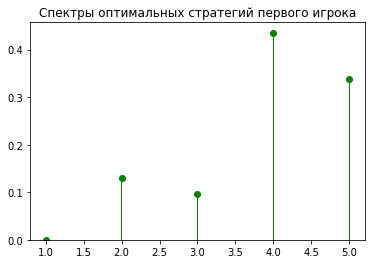

In [3]:
plt.plot(n1, p, 'go')
plt.bar(n1, p, width = 0.01, color = 'g')
plt.title("Спектры оптимальных стратегий первого игрока")
plt.show()

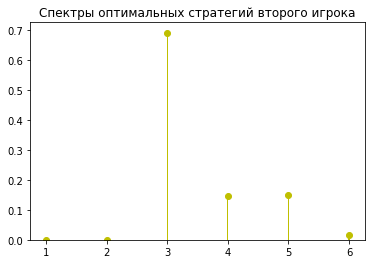

In [4]:
plt.plot(n2, q, 'yo')
plt.bar(n2, q, width = 0.02, color = 'y')
plt.title("Спектры оптимальных стратегий второго игрока")
plt.show()

In [9]:
class Test(unittest.TestCase):
   
    def test1(self):
        x = np.array([[4, -2], [1, 3]])
        p = np.array([0.25, 0.75])
        q = np.array([0.625, 0.375])
        pn, qn = nash_equilibrium(x)
        self.assertEqual(p.all(), pn.all())
        self.assertEqual(q.all(), qn.all())
        
    def test2(self):
        x = np.array([[6, 5], [4, 6], [2, 7], [1, 8]])
        p = np.array([0.875, 0., 0., 0.125])
        q = np.array([0.375, 0.625])
        pn, qn = nash_equilibrium(x)
        self.assertEqual(p.all(), pn.all())
        self.assertEqual(q.all(), qn.all())
        
    def test3(self):
        x = np.array([[1, -3], [2, 2]])
        p = np.array([0., 1.])
        q = np.array([1., 0.])
        pn, qn = nash_equilibrium(x)
        self.assertEqual(p.all(), pn.all())
        self.assertEqual(q.all(), qn.all())
         
t = unittest.TestLoader().loadTestsFromTestCase(Test)
unittest.TextTestRunner().run(t)

...

1.75
[0.25 0.75]
[0.625 0.375]
5.375
[0.875 0.    0.    0.125]
[0.375 0.625]
2.0
[0. 1.]
[1. 0.]



----------------------------------------------------------------------
Ran 3 tests in 0.051s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>